# Final Project - MCB111

## Saloni Vishwakarma, Harriet Tieh, Sanjay Patil, Zahra Rawji

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import pylab as p
from scipy import integrate
import seaborn as sns
import matplotlib.ticker as ticker
sns.set()

In [2]:
#https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

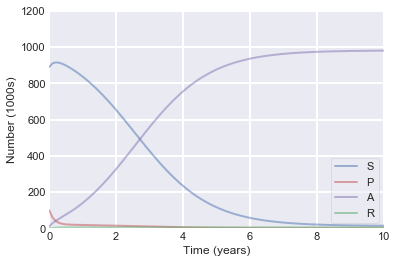

In [3]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
P0, A0, R0 = 100, 10, 0 
# Everyone else, S0, is susceptible to infection initially.
S0 = N - P0 - R0 - A0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e = 0.15, 0.0036, 7, 0.1, 0.007288, 0.01155, 0.00744, 1, 0.7, 0.2, 0.74
# A grid of time points (in days)
t = np.linspace(0, 100, 1000)

# The SIR model differential equations.
def deriv(y, t, N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e):
    S, P, A, R = y
    dSdt = -alpha*S - beta*(1-big_e)*S*A - beta*big_e*S*P + epsilon*P + delta*R + mu*(P+R)+mu_star*A
    dPdt = alpha*S - (epsilon+gamma + mu)*P
    dAdt = gamma*P + sigma*R + beta*(1-big_e)*S*A + beta*big_e*S*P + upsilon*R*A - (zeta+mu_star)*A
    dRdt = zeta*A - upsilon*R*A - (delta + sigma + mu)*R
    return dSdt, dPdt, dAdt, dRdt

# Initial conditions vector
y0 = S0, P0, A0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e))
S, P, A, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S')
ax.plot(t, P, 'r', alpha=0.5, lw=2, label='P')
ax.plot(t, A, 'm', alpha=0.5, lw=2, label='A')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1200)
ax.set_xlim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

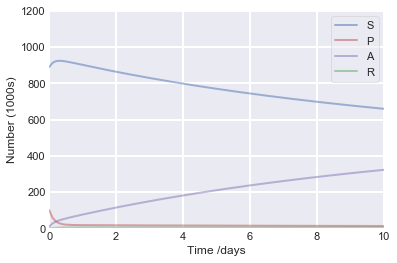

In [4]:
# Modeling total addicted population, but with adjusted differential equations to make addicted percentage more realistic.

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
P0, A0, R0 = 100, 10, 0 
# Everyone else, S0, is susceptible to infection initially.
S0 = N - P0 - R0 - A0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e, hospitals = 0.15, 0.0036, 7, 0.1, 0.007288, 0.01155, 0.00744, 1, 0.7, 0.2, 0.74, 1.5
# A grid of time points (in days)
t = np.linspace(0, 100, 1000)

# The SIR model differential equations.
def deriv(y, t, N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e):
    S, P, A, R = y
    dSdt = -alpha*S - beta*big_e*S*P + epsilon*P + delta*R + mu*(P+R)+mu_star*A + 0.1*alpha*S
    dPdt = alpha*S - (epsilon+gamma + mu)*P - 0.1*alpha*S
    dAdt = gamma*P + sigma*R + beta*big_e*S*P + upsilon*R*A - (zeta+mu_star)*A
    dRdt = zeta*A - upsilon*R*A - (delta + sigma + mu)*R
    return dSdt, dPdt, dAdt, dRdt

# Initial conditions vector
y0 = S0, P0, A0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e))
S, P, A, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S')
ax.plot(t, P, 'r', alpha=0.5, lw=2, label='P')
ax.plot(t, A, 'm', alpha=0.5, lw=2, label='A')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1200)
ax.set_xlim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [10]:
# system of ODEs
def dX_dt(X, t=0):
    return np.array([ -alpha*X[0] - beta*(1-big_e)*X[0]*X[2] - beta*big_e*X[0]*X[2] + epsilon*X[1] + delta*X[3] + mu*(X[1]+X[3])+mu_star*X[2] ,
                      alpha*X[0] - (epsilon+gamma + mu)*X[1],
                     gamma*X[1] + sigma*X[3] + beta*(1-big_e)*X[0]*X[2] + beta*big_e*X[0]*X[1] + upsilon*X[3]*X[2] - (zeta+mu_star)*X[2] ,
                    zeta*X[2] - upsilon*X[3]*X[2] - (delta + sigma + mu)*X[3]])


In [11]:
def trace_det(S,P,A,R):
    #Jacobian calculated analytically
    a11 = -alpha - beta*(1 - big_e)*A + beta*big_e*(S - P) - (epsilon + mu)                        
    a12 = -beta*(1 - 2*big_e)*S - (epsilon + mu) + mu_star
    a13 = beta*big_e*S + delta - epsilon
    a21 = -gamma + beta*(1-big_e)*A + beta*big_e*(P-S)                   
    a22 = -gamma + beta*(1-2*big_e)*S + upsilon*R - (zeta*mu_star) 
    a23 = -gamma + sigma - beta*big_e*S + upsilon*A 
    a31 = 0
    a32 = zeta - upsilon*R
    a33 = -upsilon*A - (delta + sigma + mu)    
    
    tr = a11 + a22 + a33                   # Trace
    det = a11*(a22*a33 - a23*a32)-a12*(a21*a33-a23*a31)+a13*(a21*a32-a22*a31) # Determinant
    return tr, det 

In [12]:
trace = []
det = []
cols = []

n = 100
t = np.linspace(0, n, n)

ret = odeint(deriv, y0, t, args=(N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e))
S, P, A, R = ret.T

alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e = 0.15, 0.0036, 7, 0.1, 0.007288, 0.01155, 0.00744, 1, 0.7, 0.2, 0.74


for i in range(0,n):
    alpha = i/(2*100)
    #Jacobian Matrix 
    #Since N = 1, we can say S + P + A + R = 1 and thus P = 1 - S - A - R
    a11 = -alpha - beta*(1 - big_e)*A + beta*big_e*(S - P) - (epsilon + mu)                        
    a12 = -beta*(1 - 2*big_e)*S - (epsilon + mu) + mu_star
    a13 = beta*big_e*S + delta - epsilon
    a21 = -gamma + beta*(1-big_e)*A + beta*big_e*(P-S)                   
    a22 = -gamma + beta*(1-2*big_e)*S + upsilon*R - (zeta*mu_star) 
    a23 = -gamma + sigma - beta*big_e*S + upsilon*A 
    a31 = 0
    a32 = zeta - upsilon*R
    a33 = -upsilon*A - (delta + sigma + mu)    
    
    cols.append(alpha)
    trace =(a11 + a22 + a33)                # Trace
    det = (a11*(a22*a33 - a23*a32)-a12*(a21*a33-a23*a31)+a13*(a21*a32-a22*a31)) # Determinant

# Sensititivty Analysis

## Number of facilities that provide Substance Abuse Services

In [5]:
empty_m = np.zeros((100,100))
df = pd.DataFrame(empty_m)

In [6]:
list_A = np.linspace(0,1,100)
list_B = np.linspace(0.2,2,100)
alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e = 0.15, 0.0036, 7, 0.1, 0.007288, 0.01155, 0.00744, 1, 0.7, 0.2, 0.74

N = 100
# Initial number of infected and recovered individuals, I0 and R0.
P0, A0, R0 = 30, 1, 0 
# Everyone else, S0, is susceptible to infection initially.
S0 = N - P0 - R0 - A0
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e, hospitals):
    S, P, A, R = y
    dSdt = -alpha*S - beta*(1-big_e)*S*A - beta*big_e*S*P + epsilon*P + delta*R + mu*(P+R)+mu_star*A
    dPdt = alpha*S - (epsilon+gamma + mu)*P
    dAdt = gamma*P + sigma*R + beta*(1-big_e)*S*A + beta*big_e*S*P + upsilon*R*A - (zeta+mu_star)*A - hospitals*A
    dRdt = zeta*A - upsilon*R*A - (delta + sigma + mu)*R + hospitals*A
    return dSdt, dPdt, dAdt, dRdt


counter1 = 0
counter2 = 0
for i in list_A:
    hospitals = float(i)
    for y in list_B:
        zeta = float(y)
        
        # Initial conditions vector
        y0 = S0, P0, A0, R0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e, hospitals))
        S, P, A, R = ret.T
        df.iloc[counter1][counter2] = A[99]
        counter2 += 1
    counter2 = 0
    counter1 += 1
        

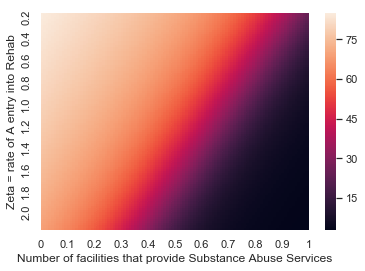

In [7]:
list_A = np.linspace(0,1,10)
list_B = np.linspace(0.2,2,10)
ax = sns.heatmap(df)
ax.xaxis.set_major_locator(ticker.LinearLocator())
ax.xaxis.set_major_formatter(ticker.FixedFormatter([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
ax.yaxis.set_major_locator(ticker.LinearLocator())
ax.yaxis.set_major_formatter(ticker.FixedFormatter([0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2.]))
plt.xlabel('Number of facilities that provide Substance Abuse Services')
plt.ylabel('Zeta = rate of A entry into Rehab')
plt.show()

## Percent of Uninsured Americans

In [8]:
empty_m = np.zeros((100,100))
df = pd.DataFrame(empty_m)

In [9]:
list_A = np.linspace(0.05,0.2,100)
list_B = np.linspace(0,1,100)
alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e = 0.15, 0.0036, 7, 0.1, 0.007288, 0.01155, 0.00744, 1, 0.7, 0.2, 0.74

N = 100
# Initial number of infected and recovered individuals, I0 and R0.
P0, A0, R0 = 30, 1, 0 
# Everyone else, S0, is susceptible to infection initially.
S0 = N - P0 - R0 - A0
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e, uninsured):
    S, P, A, R = y
    dSdt = -alpha*S - beta*(1-big_e)*S*A - beta*big_e*S*P + epsilon*P + delta*R + mu*(P+R)+mu_star*A + uninsured*S
    dPdt = alpha*S - (epsilon+gamma + mu)*P - uninsured*S
    dAdt = gamma*P + sigma*R + beta*(1-big_e)*S*A + beta*big_e*S*P + upsilon*R*A - (zeta+mu_star)*A + uninsured*A
    dRdt = zeta*A - upsilon*R*A - (delta + sigma + mu)*R - uninsured*A
    return dSdt, dPdt, dAdt, dRdt


counter1 = 0
counter2 = 0
for i in list_A:
    uninsured = float(i)
    for y in list_B:
        big_e = float(y)
        
        # Initial conditions vector
        y0 = S0, P0, A0, R0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N, alpha, beta, epsilon, delta, mu, mu_star, gamma, zeta, sigma, upsilon, big_e, uninsured))
        S, P, A, R = ret.T
        df.iloc[counter1][counter2] = A[99]
        counter2 += 1
    counter2 = 0
    counter1 += 1


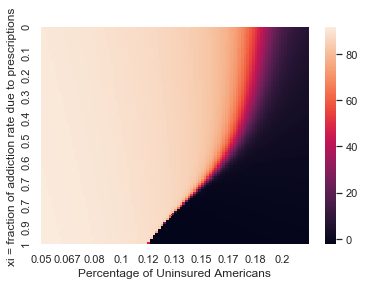

In [10]:
list_A = np.linspace(0.05,0.2,10)
list_B = np.linspace(0,1,10)
ax = sns.heatmap(df)
ax.xaxis.set_major_locator(ticker.LinearLocator())
ax.xaxis.set_major_formatter(ticker.FixedFormatter([0.05,  0.067,  0.08,  0.1 , 0.12, 0.13,  0.15 ,  0.17,  0.18,  0.2]))
ax.yaxis.set_major_locator(ticker.LinearLocator())
ax.yaxis.set_major_formatter(ticker.FixedFormatter([0,  0.1,  0.2,  0.3,  0.4 ,  0.5,  0.6,  0.7,  0.7,  0.9, 1]))
plt.xlabel('Percentage of Uninsured Americans')
plt.ylabel('xi = fraction of addiction rate due to prescriptions')
plt.show()